In [32]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

from sklearn.metrics import precision_score, recall_score, accuracy_score, auc, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [33]:
# lecture de la donnee

train_data = pd.read_csv('./files/train.csv')
test_data = pd.read_csv('./files/test.csv')

In [4]:
train_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var14910,Var14913,Var14921,Var14923,Var14965,Var14989,Var14990,Var14993,Var14995,upselling
260,0,0,0,0,0,0,0.0,0,0,0,...,py8m,T_o9,p3by,tZW4IZa0r2,vGEg,w5gq,9M7C,abXryMS,KttQ,1
124,0,0,0,0,0,0,0.0,0,0,0,...,py8m,7snC,p3by,SOK61o0,j5pb,w5gq,6vNZ,iMHYkhP,KttQ,1
33,0,0,0,0,0,0,0.0,0,0,0,...,py8m,bTEW,p3by,SCQzH0gZvV5Y2,FFED,0tBF,9M7C,XQr8uFD,KttQ,-1
86,0,0,0,0,0,0,0.0,0,0,0,...,py8m,bAUD,p3by,ILESZvp,x0OI,w5gq,Eudn,wxMEnTY,Q8_a,-1
264,0,0,0,0,0,0,0.0,0,0,0,...,py8m,tMsC,p3by,ILESZvp,v5zI,w5gq,X7HG,ANI26ea,KttQ,-1


In [51]:
test_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var14910,Var14913,Var14921,Var14923,Var14965,Var14989,Var14990,Var14993,Var14995,upselling
0,0,0,0,0,0,0,0.0,0,0,0,...,py8m,Yduz,p3by,tZW4IZa0r2,StWh,w5gq,X7HG,uv8Wj53,KttQ,-1
1,0,0,0,0,0,0,0.0,0,0,0,...,py8m,9Fwy,p3by,ILESZvp,jD4M,w5gq,aEJz,pCvy47L,Q8_a,-1
2,0,0,0,0,0,0,0.0,0,0,0,...,py8m,fnW1,p3by,SCQzH0gZvV5Y2,Rgs9,w5gq,y2ie,WcV_FAL,Q8_a,-1
3,0,0,0,0,0,0,0.0,0,0,0,...,py8m,I7rY,p3by,qbwABQk,e5M2,w5gq,77a1,3GXPg47,Q8_a,-1
4,0,0,0,0,0,0,0.0,0,0,0,...,py8m,ml35,p3by,ILESZvp,MT6F,w5gq,X7HG,rYUDJ29,KttQ,-1


In [34]:
colums_to_cast = train_data.columns[train_data.dtypes == 'object'].to_list()
for column in colums_to_cast:
    train_data[column] = train_data[column].astype('category')
    test_data[column] = test_data[column].astype('category')

x_train = train_data.drop("upselling", axis=1)
y_train = train_data["upselling"]
x_test = test_data.drop("upselling", axis=1)
y_test = test_data["upselling"]

y_train = y_train.replace(-1, 0)
y_test = y_test.replace(-1, 0)

In [7]:
model = XGBClassifier(n_estimators=50, max_depth=2 , enable_categorical=True)
model.fit(x_train, y_train)

C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:463: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  or is_sparse(dtype)
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:464: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or (is_categorical_dtype(dtype) and enable_categorical)
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtyp

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [8]:
predictions = model.predict(x_test)

C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:463: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  or is_sparse(dtype)
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:464: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or (is_categorical_dtype(dtype) and enable_categorical)
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtyp

In [31]:
# On va evaluer les metriques precision, recall, accuracy
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("Accuracy: ", accuracy_score(y_test, predictions))

Precision:  0.76
Recall:  0.6129032258064516
Accuracy:  0.6785714285714286


In [30]:
# faire un predict en changeant le treshold
threshold = 0.015
predictions = (model.predict_proba(x_test)[:, 1] > threshold).astype(int)

C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:463: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  or is_sparse(dtype)
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:464: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or (is_categorical_dtype(dtype) and enable_categorical)
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtyp

In [6]:
from sklearn.metrics import roc_auc_score
print("AUC: ", roc_auc_score(y_test, predictions))

AUC:  0.6568986568986568


In [89]:
# On va tester plusieurs n_estimators et max_depth pour voir le plus optimal

n_estimators = [50, 100, 150, 200, 250, 300]
max_depth = [2, 4, 6, 8, 10, 12]

best_n_estimator = 0
best_max_depth = 0
max_auc = 0

for n_estimator in n_estimators:
    for depth in max_depth:
        model = XGBClassifier(n_estimators=n_estimator, max_depth=depth , enable_categorical=True)
        model.fit(x_train, y_train)
        predictions = (model.predict_proba(x_test)[:, 1] > threshold).astype(int)
        auc = roc_auc_score(y_test, predictions)
        if auc > max_auc:
            max_auc = auc
            best_n_estimator = n_estimator
            best_max_depth = depth

print("Best n_estimator: ", best_n_estimator)
print("Best max_depth: ", best_max_depth)
print("Best AUC: ", max_auc)

C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:463: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  or is_sparse(dtype)
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:464: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or (is_categorical_dtype(dtype) and enable_categorical)
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtyp

Best n_estimator:  50
Best max_depth:  2
Best AUC:  0.6568986568986568


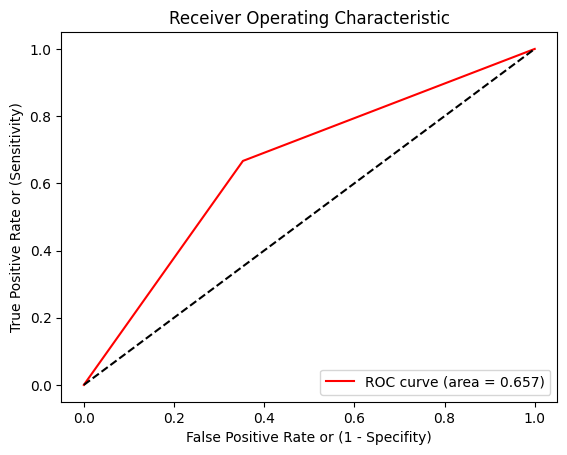

In [7]:
# visualiser la courbe ROC

fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, color="red", label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
# On va faire le training avec stratified k-fold cross validation
threshold = 0.015
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
aucs = []

for train_index, test_index in skf.split(x_train, y_train):
    x_train_fold, x_test_fold = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    model = XGBClassifier(n_estimators=50, max_depth=2 , enable_categorical=True)
    model.fit(x_train_fold, y_train_fold)
    #predictions = model.predict(x_test_fold)
    predictions = (model.predict_proba(x_test_fold)[:, 1] > threshold).astype(int)
    auc = roc_auc_score(y_test_fold, predictions)
    aucs.append(auc)

C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:463: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  or is_sparse(dtype)
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:464: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  or (is_categorical_dtype(dtype) and enable_categorical)
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\ADMIN\Desktop\lab_data_science\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtyp

In [38]:
for i, auc in enumerate(aucs):
    print(f"Iteration {i+1} AUC:  {auc}")

print("AUC mean: ", np.mean(aucs))

Iteration 1 AUC:  0.7120866196208662
Iteration 2 AUC:  0.6242216687422166
Iteration 3 AUC:  0.6152424440095673
Iteration 4 AUC:  0.586890243902439
Iteration 5 AUC:  0.7179185144124168
AUC mean:  0.6512718981375012


In [39]:
# Sauvegarder le model
import pickle
pickle.dump(model, open("model.pkl", "wb"))